In [30]:
import pandas as pd 
import numpy as np 

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, balanced_accuracy_score
import shap
from scipy.stats import  pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import scipy
import scipy.optimize as opt
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv("/Users/alteafogh/Documents/ITU/AFAE/AFAE_school/dropout_dataset.csv")

In [3]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [6]:
data = data.drop(columns=['Application mode',"Course",'Previous qualification',"Nacionality", 'Mother\'s qualification', 'Father\'s qualification',
       'Mother\'s occupation', 'Father\'s occupation','Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)','Unemployment rate',
       'Inflation rate', 'GDP', "Debtor"], axis=1)

KeyError: '[\'Application mode\', \'Course\', \'Previous qualification\', \'Nacionality\', "Mother\'s qualification", "Father\'s qualification", "Mother\'s occupation", "Father\'s occupation", \'Curricular units 1st sem (credited)\', \'Curricular units 1st sem (enrolled)\', \'Curricular units 1st sem (evaluations)\', \'Curricular units 1st sem (approved)\', \'Curricular units 1st sem (grade)\', \'Curricular units 1st sem (without evaluations)\', \'Curricular units 2nd sem (credited)\', \'Curricular units 2nd sem (enrolled)\', \'Curricular units 2nd sem (evaluations)\', \'Curricular units 2nd sem (approved)\', \'Curricular units 2nd sem (grade)\', \'Curricular units 2nd sem (without evaluations)\', \'Unemployment rate\', \'Inflation rate\', \'GDP\', \'Debtor\'] not found in axis'

In [7]:
data["Application order"] = data["Application order"] < 2
data["Application order"] = data["Application order"].astype(int)

In [8]:
data["Age at enrollment"] = data["Age at enrollment"] <=23
data["Age at enrollment"] =data["Age at enrollment"].astype(int)


In [9]:
data.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
data = data[data["Target"]!= "Enrolled"]

In [11]:
data["Target"] = data["Target"].map({"Graduate":1, "Dropout":0})


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
data["Marital status"].value_counts()

1    3199
2     327
4      75
5      22
6       5
3       2
Name: Marital status, dtype: int64

In [13]:
cols = ["Marital status"]

df_processed = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=cols, drop_first=True)

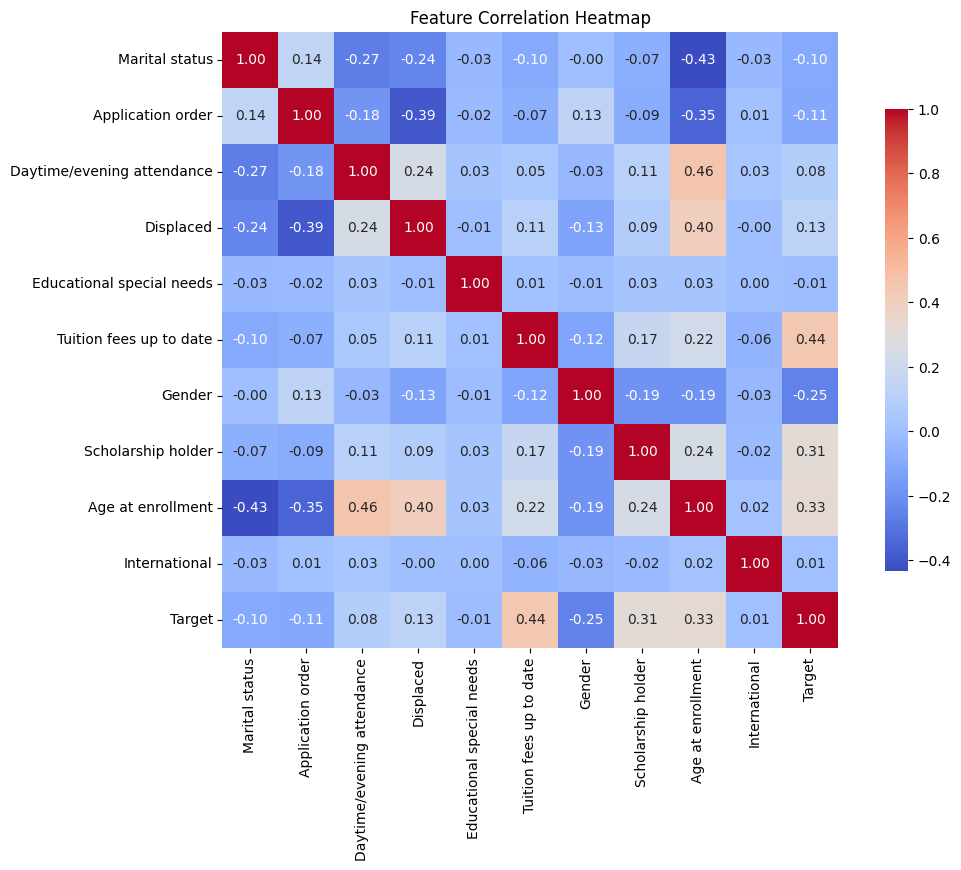

In [14]:


# Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75})

# Set title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

In [26]:
df_processed

,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Target,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6
0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0
4420,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0
4421,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4422,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0


In [15]:
y = df_processed["Target"]
X = df_processed.drop("Target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:

logistic_model = LogisticRegression(max_iter=5000, penalty=None, C=0.8497534359086438, tol=1e-4, solver="saga")

# Fit the model
logistic_model.fit(X_train, y_train)

# Predictions
log_y_pred = logistic_model.predict(X_test)
log_y_prob = logistic_model.predict_proba(X_test)[:, 1]

Setting penalty=None will ignore the C and l1_ratio parameters


In [17]:
log_accuracy = accuracy_score(y_test, log_y_pred)
log_accuracy

0.7699724517906336

In [44]:
group_test_dict = {
    "Female": X_test["Gender"] == 0, 
    "Male": X_test["Gender"] == 1,
    "Over_23": X_test["Age at enrollment"] ==0,
    "Under_23": X_test["Age at enrollment"] ==1
}

In [45]:
# Calculate and print F1 Scores for each group
for group, group_idxs in group_test_dict.items():
    print(f'F1, {group}: {f1_score(y_test[group_idxs], log_y_pred[group_idxs]):.2f}')

# Calculate and print positive rates for each group
for group, group_idxs in group_test_dict.items():
    print(f'Positive Rate, {group}: {np.mean(log_y_pred[group_idxs]):.2f}')
    # Calculate and print positive rates for each group
for group, group_idxs in group_test_dict.items():
    print(f'Accuracy, {group}: {accuracy_score(y_test[group_idxs],log_y_pred[group_idxs]):.2f}')

for group, group_idxs in group_test_dict.items():
    print(f'Balanced Accuracy, {group}: {balanced_accuracy_score(y_test[group_idxs],log_y_pred[group_idxs]):.2f}')

F1, Female: 0.87
F1, Male: 0.72
F1, Over_23: 0.47
F1, Under_23: 0.88
Positive Rate, Female: 0.82
Positive Rate, Male: 0.54
Positive Rate, Over_23: 0.29
Positive Rate, Under_23: 0.91
Accuracy, Female: 0.80
Accuracy, Male: 0.72
Accuracy, Over_23: 0.69
Accuracy, Under_23: 0.80
Balanced Accuracy, Female: 0.70
Balanced Accuracy, Male: 0.72
Balanced Accuracy, Over_23: 0.63
Balanced Accuracy, Under_23: 0.63


In [ ]:
# Step 2: Filter data for a specific gender (sex_2 == 1)
gender_mask_women = (X_test['Gender'] == 0)  # Change to 0 for the other gender # Women
y_true_gender_women = y_test[gender_mask_women]
y_pred_gender_women = log_y_pred[gender_mask_women]
# Step 3: Compute accuracy for the selected gender

accuracy_women = accuracy_score(y_true_gender_women, y_pred_gender_women)
f1_score_women = f1_score(y_true_gender_women, y_pred_gender_women) 
balanced_accuracy_women = balanced_accuracy_score(y_true_gender_women, y_pred_gender_women)

print(f"Accuracy for Women (gender = 0) : {accuracy_women:.4f}, f1-score: {f1_score_women:.4f} and balanced accuracy: {balanced_accuracy_women:.4f}")

# Step 2: Filter data for a specific gender (sex_2 == 1)
gender_mask_men = (X_test['Gender'] == 1)  # Change to 0 for the other gender # Women
y_true_gender_men = y_test[gender_mask_men]
y_pred_gender_men = log_y_pred[gender_mask_men]

# Step 3: Compute accuracy for the selected gender
accuracy_men = accuracy_score(y_true_gender_men, y_pred_gender_men)
f1_score_men = f1_score(y_true_gender_men, y_pred_gender_men) 
balanced_accuracy_men = balanced_accuracy_score(y_true_gender_men, y_pred_gender_men)

print(f"Accuracy for Men (gender = 1) : {accuracy_men:.4f}, f1-score: {f1_score_men:.4f} and balanced accuracy: {balanced_accuracy_men:.4f}")
# Accuracy values
genders = ["Women", "Men", "Balanced Women", "Balanced Men", "F1 Score Women", "F1 Score Men"]
accuracies = [accuracy_women, accuracy_men, balanced_accuracy_women, balanced_accuracy_men, f1_score_women, f1_score_men]

# Plot the accuracies
plt.figure(figsize=(6, 5))
plt.bar(genders, accuracies, color=['orange', 'teal'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy by Gender")
plt.xticks(rotation=45)

# Display values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=12)

plt.show()

# fairness metrics and fixing them

In [18]:
X_test["Tuition fees up to date"].value_counts()

1    623
0    103
Name: Tuition fees up to date, dtype: int64

In [19]:
np.unique(log_y_pred[X_test["Tuition fees up to date"]], return_counts=True)

(array([1]), array([726]))

calculating fairness metrics


In [26]:
def stat_parity(pred, feature):
    group1 = np.mean(pred[feature == 0]) 
    group2 = np.mean(pred[feature == 1]) 
    return group1, group2

def equal_odds(pred, target, feature):
    group1 = np.mean(pred[(y_test == target) & (feature == 0)])
    group2 = np.mean(pred[(y_test == target) & (feature == 1)])
    return group1, group2

def fairness(pred, feature):
    scores = [stat_parity(pred, feature), 
           equal_odds(pred, 0, feature), 
           equal_odds(pred, 1, feature)]
    names = ["stat_parity",
                "eq_odds_t0",
                "eq_odds_t1"]
    df_fair_metrics = pd.DataFrame({"score":[], "metric" : [], "group":[]})
    for i in range(len(names)):
        g1,g2 = scores[i]
        new_metrics = {"score":[g1, g2], "metric" : [names[i], names[i]], "group":["Older than 23", "Younger than 23"]}
        df_fair_metrics = pd.concat([df_fair_metrics, pd.DataFrame(new_metrics)], ignore_index=True)
    
    return df_fair_metrics

log_fairness_age = fairness(log_y_pred, X_test["Age at enrollment"])


print(log_fairness_age)



      score       metric            group
0  0.290323  stat_parity    Older than 23
1  0.909627  stat_parity  Younger than 23
2  0.215686   eq_odds_t0    Older than 23
3  0.710938   eq_odds_t0  Younger than 23
4  0.468750   eq_odds_t1    Older than 23
5  0.976378   eq_odds_t1  Younger than 23


In [27]:
def stat_parity(pred, feature):
    group1 = np.mean(pred[feature == 0]) 
    group2 = np.mean(pred[feature == 1]) 
    return group1, group2

def equal_odds(pred, target, feature):
    group1 = np.mean(pred[(y_test == target) & (feature == 0)])
    group2 = np.mean(pred[(y_test == target) & (feature == 1)])
    return group1, group2

def fairness(pred, feature):
    scores = [stat_parity(pred, feature), 
           equal_odds(pred, 0, feature), 
           equal_odds(pred, 1, feature)]
    names = ["stat_parity",
                "eq_odds_t0",
                "eq_odds_t1"]
    df_fair_metrics = pd.DataFrame({"score":[], "metric" : [], "group":[]})
    for i in range(len(names)):
        g1,g2 = scores[i]
        new_metrics = {"score":[g1, g2], "metric" : [names[i], names[i]], "group":["female", "male"]}
        df_fair_metrics = pd.concat([df_fair_metrics, pd.DataFrame(new_metrics)], ignore_index=True)
    
    return df_fair_metrics

log_fairness_gender = fairness(log_y_pred, X_test["Gender"])


print(log_fairness_gender)



      score       metric   group
0  0.820084  stat_parity  female
1  0.540323  stat_parity    male
2  0.537415   eq_odds_t0  female
3  0.335821   eq_odds_t0    male
4  0.945619   eq_odds_t1  female
5  0.780702   eq_odds_t1    male


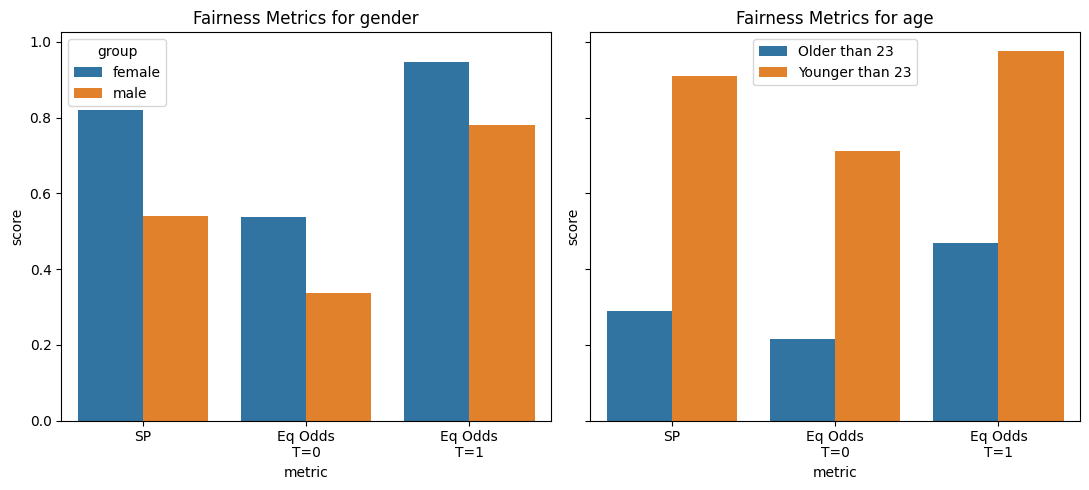

In [28]:
def plot_fairness(log_gender, log_age):
    _, ax = plt.subplots(1,2, figsize=(11,5), sharey=True)

    sns.barplot(data = log_gender,
                x = 'metric',
                y = 'score',
                hue = 'group',
                ax=ax[0]
                )

    sns.barplot(data = log_age,
                x = 'metric',
                y = 'score',
                hue= 'group',
                ax=ax[1]
                )

    plt.legend()
    ax[0].set_title("Fairness Metrics for gender")
    ax[1].set_title("Fairness Metrics for age")

    ax[0].set_xticks([0,1,2], ['SP', f'Eq Odds\nT=0', f'Eq Odds\nT=1'])
    ax[1].set_xticks([0,1,2], ['SP', f'Eq Odds\nT=0', f'Eq Odds\nT=1'])

    plt.tight_layout()

    plt.show()

plot_fairness(log_fairness_gender, log_fairness_age)

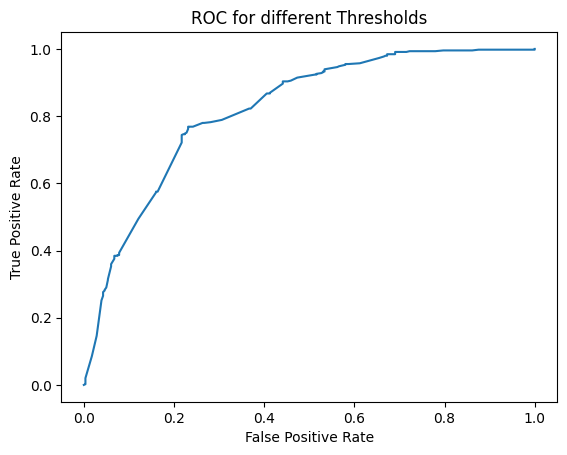

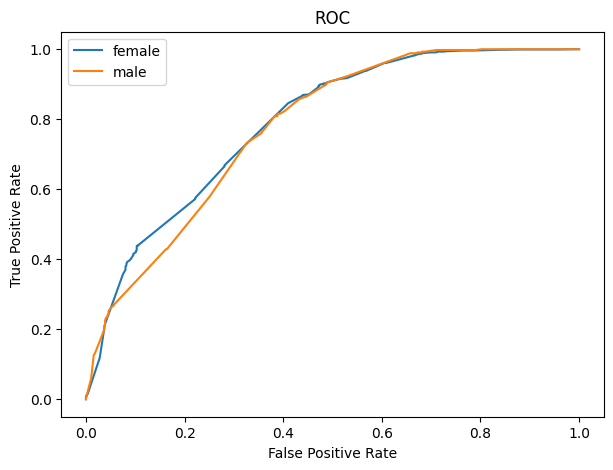

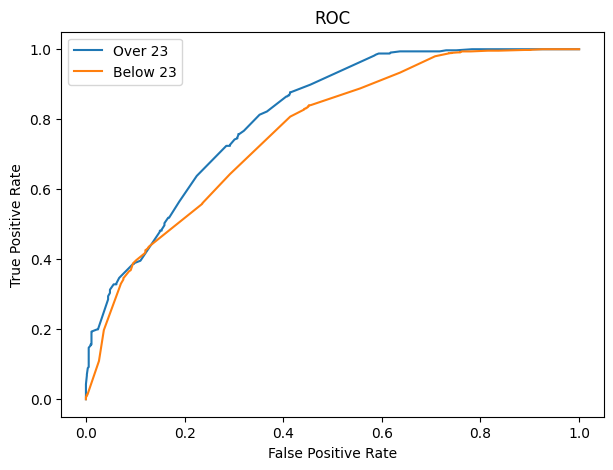

0.7934601698019356 0.572342325589459
0.37678134769941407 0.7108603506428909


In [33]:
def  roc_curve_generator(test, prob): 
    # Compute ROC curve 
    #false positive rate, true positive rate, threshold
    fpr, tpr, thr = roc_curve(test, prob, drop_intermediate=False)

    # Plot it
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.set_title("ROC for different Thresholds")
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")

def  roc_curve_generator_groups(test_1, prob_1, test_2, prob_2, group_1, group_2): 
    fpr_1, tpr_1, thr_1 = roc_curve(test_1, prob_1, drop_intermediate=False)
    fpr_2, tpr_2, thr_2 = roc_curve(test_2, prob_2, drop_intermediate=False)

    tpr_diff = []
    fpr_diff = []
    thresholds = []
    for p in np.arange(0.1, 0.99, 0.001):
        tpr_diff.append(abs(tpr_1[tpr_1>p][0] - tpr_2[tpr_2>p][0]))
        fpr_diff.append(abs(fpr_1[tpr_1>p][0] - fpr_2[tpr_2>p][0]))
        thresholds.append((thr_1[tpr_1>p][0], thr_2[tpr_2>p][0]))

    diffs = []
    for i in range(len(fpr_diff)):
        diffs.append(abs(fpr_diff[i] - tpr_diff[i]))

    n = np.argmin(diffs)

    thr_group1, thr_group2 = thresholds[n]


    #plot
    _, ax = plt.subplots(1,1, figsize=(7,5))

    ax.plot(fpr_1, tpr_1, label=group_1)
    ax.plot(fpr_2, tpr_2, label=group_2)

    ax.set_title("ROC")
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    plt.legend()
    plt.show()
    return thr_group1, thr_group2

roc_curve_generator(y_test, log_y_prob)


# separate ROC for each group
log_y_prob_female = logistic_model.predict_proba(X_train[X_train["Gender"]==0])[:,1]
log_y_prob_male = logistic_model.predict_proba(X_train[X_train["Gender"]==1])[:,1]
log_thr_female, log_thr_male = roc_curve_generator_groups(y_train[X_train["Gender"]==0], log_y_prob_female, y_train[X_train["Gender"]==1], log_y_prob_male, "female", "male")

# separate ROC for each group
log_y_prob_old = logistic_model.predict_proba(X_train[X_train["Age at enrollment"]==0])[:,1]
log_y_prob_young = logistic_model.predict_proba(X_train[X_train["Age at enrollment"]==1])[:,1]
log_thr_old, log_thr_young = roc_curve_generator_groups(y_train[X_train["Age at enrollment"]==0], log_y_prob_old, y_train[X_train["Age at enrollment"]==1], log_y_prob_young, "Over 23", "Below 23")


print(log_thr_female, log_thr_male)
print(log_thr_old, log_thr_young)




0.6019283746556474 0.721763085399449
      score       metric   group
0  0.315900  stat_parity  Female
1  0.447581  stat_parity    Male
2  0.108844   eq_odds_t0  Female
3  0.276119   eq_odds_t0    Male
4  0.407855   eq_odds_t1  Female
5  0.649123   eq_odds_t1    Male       score       metric            group
0  0.566820  stat_parity    Older than 23
1  0.734774  stat_parity  Younger than 23
2  0.470588   eq_odds_t0    Older than 23
3  0.429688   eq_odds_t0  Younger than 23
4  0.796875   eq_odds_t1    Older than 23
5  0.837270   eq_odds_t1  Younger than 23


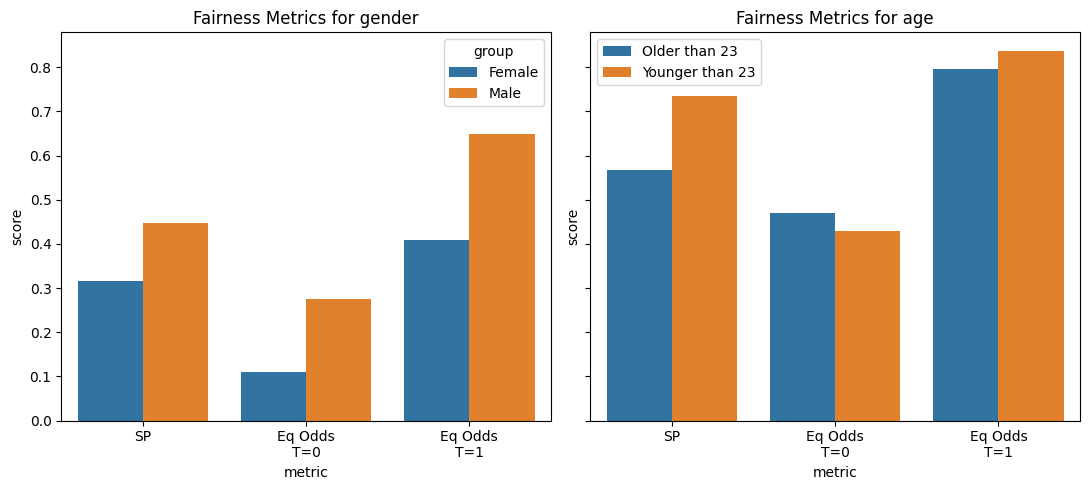

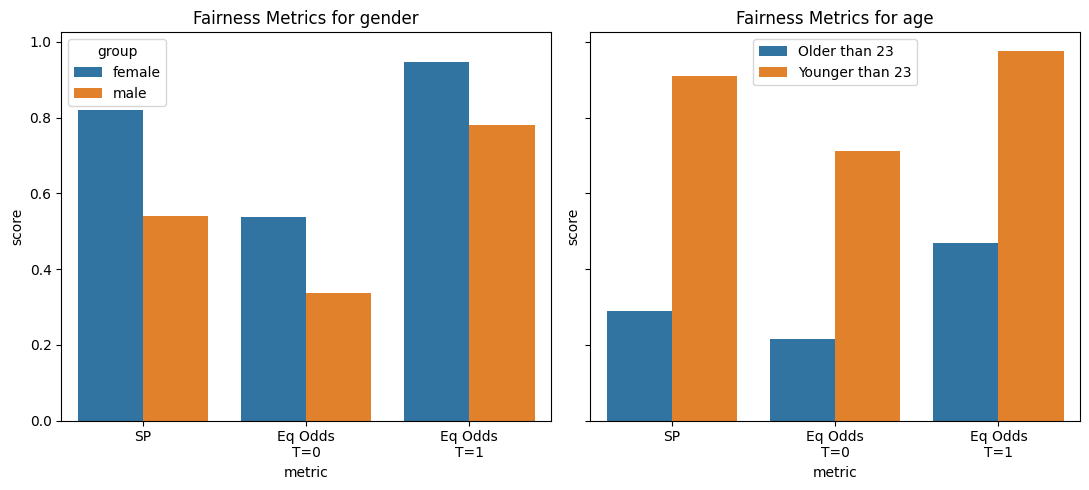

In [34]:
def new_accuracy(prob, thr_1, thr_2, feature_name, group_0, group_1):    
    new_pred = []
    for i, y in list(enumerate(prob)):
        if not X_test[feature_name].iloc[i]:
            if y >= thr_1:
                new_pred.append(1)
            else:
                new_pred.append(0)
        else: 
            if y >= thr_2:
                new_pred.append(1)
            else:
                new_pred.append(0)
    new_y_pred = pd.DataFrame()
    new_y_pred['group_test'] = X_test[feature_name]
    new_y_pred['y_test'] = y_test
    new_y_pred['pred'] = new_pred

    stp_1 = np.mean(new_y_pred['pred'].where(new_y_pred['group_test'] == 0))
    stp_2 = np.mean(new_y_pred['pred'].where(new_y_pred['group_test'] == 1))
    eq_odds_T1_1 = np.mean(new_y_pred['pred'].where(new_y_pred['y_test'] == 1).where(new_y_pred['group_test'] == 0))
    eq_odds_T1_2 = np.mean(new_y_pred['pred'].where(new_y_pred['y_test'] == 1).where(new_y_pred['group_test'] == 1))
    eq_odds_T0_1 = np.mean(new_y_pred['pred'].where(new_y_pred['y_test'] == 0).where(new_y_pred['group_test'] == 0))
    eq_odds_T0_2 = np.mean(new_y_pred['pred'].where(new_y_pred['y_test'] == 0).where(new_y_pred['group_test'] == 1))
    
    scores = [(stp_1,stp_2), 
           (eq_odds_T0_1,eq_odds_T0_2), 
           (eq_odds_T1_1,eq_odds_T1_2)]
    names = ["stat_parity",
                "eq_odds_t0",
                "eq_odds_t1"]
    df_fair_metrics = pd.DataFrame({"score":[], "metric" : [], "group":[]})
    for i in range(len(names)):
        g1,g2 = scores[i]
        new_metrics = {"score":[g1, g2], "metric" : [names[i], names[i]], "group":[group_0, group_1]}
        df_fair_metrics = pd.concat([df_fair_metrics, pd.DataFrame(new_metrics)], ignore_index=True)
    
    return accuracy_score(y_test, new_pred), df_fair_metrics

new_log_accuracy_gender, new_log_fairness_gender = new_accuracy(log_y_prob, log_thr_female, log_thr_male,"Gender", "Female", "Male")
new_log_accuracy_age, new_log_fairness_age = new_accuracy(log_y_prob, log_thr_old, log_thr_young,"Age at enrollment", "Older than 23", "Younger than 23")

print(new_log_accuracy_gender,new_log_accuracy_age)
print(new_log_fairness_gender, new_log_fairness_age)


plot_fairness(new_log_fairness_gender, new_log_fairness_age)
plot_fairness(log_fairness_gender, log_fairness_age)

# logistic without protected features

In [41]:
X_train_np = X_train.drop(columns=["Gender", "Age at enrollment"], axis=1)
X_test_np = X_test.drop(columns=["Gender", "Age at enrollment"], axis=1)

In [42]:
logistic_model_np = LogisticRegression(max_iter=5000, penalty=None, C=0.8497534359086438, tol=1e-4, solver="saga")


logistic_model_np.fit(X_train_np, y_train)
log_y_pred_np = logistic_model_np.predict(X_test_np)
log_accuracy_np = accuracy_score(y_test, log_y_pred_np)
log_accuracy_np

Setting penalty=None will ignore the C and l1_ratio parameters


0.731404958677686

Accuracy for Women (gender = 0) : 0.7845, f1-score: 0.8625 and balanced accuracy: 0.6648
Accuracy for Men (gender = 1) : 0.6290, f1-score: 0.7032 and balanced accuracy: 0.6534


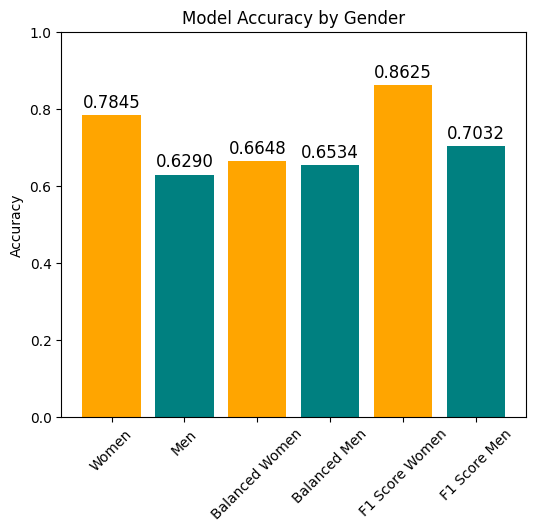

In [49]:
# Step 2: Filter data for a specific gender (sex_2 == 1)
gender_mask_women = (X_test['Gender'] == 0)  # Change to 0 for the other gender # Women
y_true_gender_women = y_test[gender_mask_women]
y_pred_gender_women_np = log_y_pred_np[gender_mask_women]
# Step 3: Compute accuracy for the selected gender

accuracy_women_np = accuracy_score(y_true_gender_women, y_pred_gender_women_np)
f1_score_women_np = f1_score(y_true_gender_women, y_pred_gender_women_np) 
balanced_accuracy_women_np = balanced_accuracy_score(y_true_gender_women, y_pred_gender_women_np)

print(f"Accuracy for Women (gender = 0) : {accuracy_women_np:.4f}, f1-score: {f1_score_women_np:.4f} and balanced accuracy: {balanced_accuracy_women_np:.4f}")

# Step 2: Filter data for a specific gender (sex_2 == 1)
gender_mask_men = (X_test['Gender'] == 1)  # Change to 0 for the other gender # Women
y_true_gender_men = y_test[gender_mask_men]
y_pred_gender_men_np = log_y_pred_np[gender_mask_men]

# Step 3: Compute accuracy for the selected gender
accuracy_men_np = accuracy_score(y_true_gender_men, y_pred_gender_men_np)
f1_score_men_np = f1_score(y_true_gender_men, y_pred_gender_men_np) 
balanced_accuracy_men_np = balanced_accuracy_score(y_true_gender_men, y_pred_gender_men_np)

print(f"Accuracy for Men (gender = 1) : {accuracy_men_np:.4f}, f1-score: {f1_score_men_np:.4f} and balanced accuracy: {balanced_accuracy_men_np:.4f}")
# Accuracy values
genders = ["Women", "Men", "Balanced Women", "Balanced Men", "F1 Score Women", "F1 Score Men"]
accuracies = [accuracy_women_np, accuracy_men_np, balanced_accuracy_women_np, balanced_accuracy_men_np, f1_score_women_np, f1_score_men_np]

# Plot the accuracies
plt.figure(figsize=(6, 5))
plt.bar(genders, accuracies, color=['orange', 'teal'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy by Gender")
plt.xticks(rotation=45)

# Display values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=12)

plt.show()

# fair PCA

In [35]:
X_train.columns

Index(['Application order', 'Daytime/evening attendance', 'Displaced',
       'Educational special needs', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'International',
       'Marital status_2', 'Marital status_3', 'Marital status_4',
       'Marital status_5', 'Marital status_6'],
      dtype='object')

In [36]:
class FairPCA:
    def __init__(self, Xs, p_idxs, n_components):
        Xs = Xs.values
        self.fit(Xs, p_idxs, n_components)

    def fit(self, Xs, p_idxs, n_components):
        # Extract protected features
        Xs_p = Xs[:, p_idxs]

        # Compute projection matrix (U)
        Z = Xs_p
        #Z = Z - Z.mean(0) # Since we alredy standardised everything, there is not much sense in removing the mean
        R = scipy.linalg.null_space(Z.T @ Xs)
        eig_vals, L = scipy.linalg.eig(R.T @ Xs.T @ Xs @ R)
        self.U = R @ L[:, :n_components]

    def project(self, Xs):
        return Xs @ self.U
    
fair_pca = FairPCA(X_train, [5, 7], 30)
Xs_train_debiased = fair_pca.project(X_train)
Xs_test_debiased = fair_pca.project(X_test)

In [37]:
X_train_p = X_train[["Gender", "Age at enrollment"]]
X_test_p = X_test[["Gender", "Age at enrollment"]]

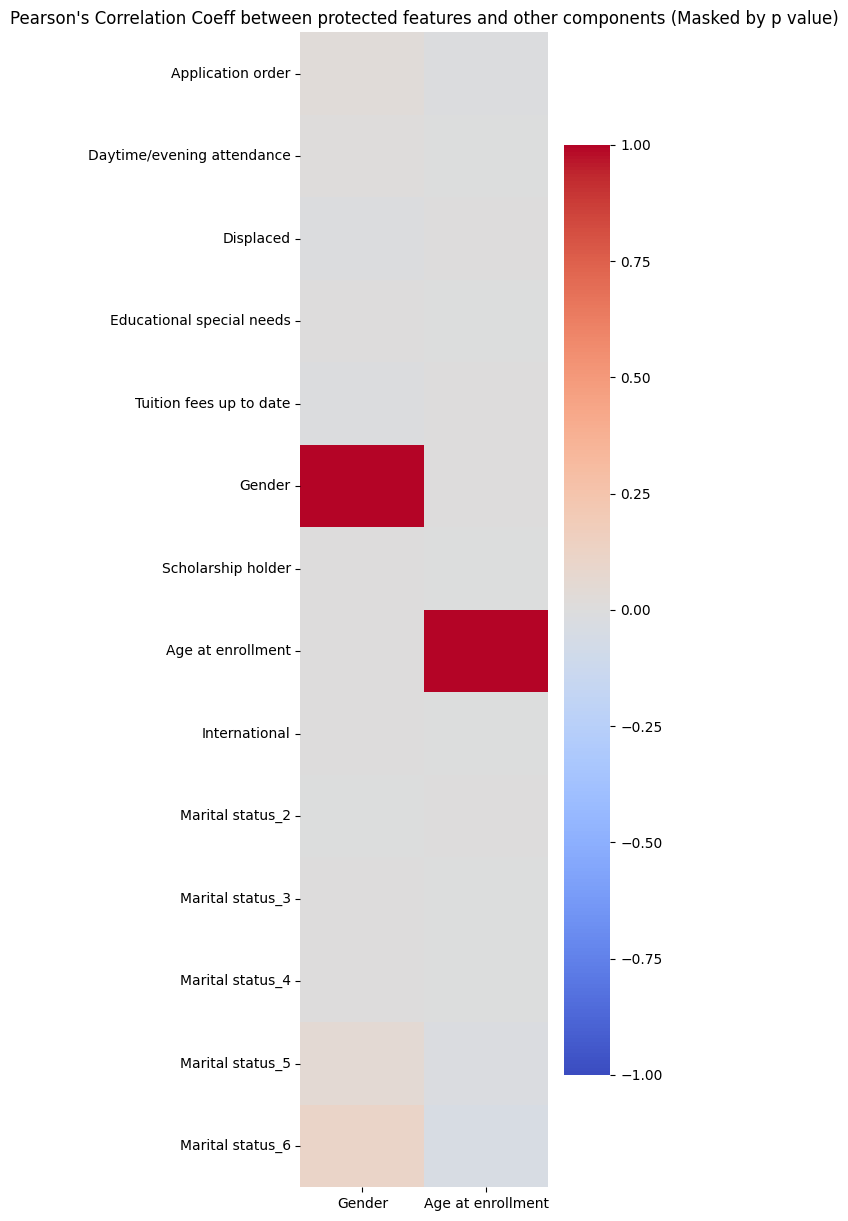

In [38]:
# Compute correlation matrix
Xs_train_debiased_p = np.concatenate([Xs_train_debiased, X_train_p], axis=1)
n_features = Xs_train_debiased_p.shape[1]
corr_ = np.zeros((n_features, n_features))
p_ = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        corr_[i,j], p_[i,j] = pearsonr(Xs_train_debiased_p[:,i], Xs_train_debiased_p[:,j])
        corr_ = np.nan_to_num(corr_, 0)

# Plot correlations with protected features
plt.figure(figsize=(4,15))
sns.heatmap(corr_[:, [5, 7]], cmap="coolwarm", 
            xticklabels=["Gender", "Age at enrollment"], yticklabels=X_train.columns,
            vmin=-1, vmax=1)
plt.title("Pearson's Correlation Coeff between protected features and other components (Masked by p value)")
plt.show()